In [1]:
import numpy as np
import matplotlib.pyplot as plt
import thinkplot
import scipy.signal
import ipywidgets as widgets

from thinkdsp import decorate, SquareSignal, Wave, zero_pad
from ipywidgets import interact, interactive, fixed

In [2]:
np.set_printoptions(precision=3, suppress=True)

# Exercise 1

In [3]:
def plot_filter(M=11, std=2):
    signal = SquareSignal(freq=440)
    wave = signal.make_wave(duration=1, framerate=44100)
    spectrum = wave.make_spectrum()

    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    high = gaussian.max()
    thinkplot.preplot(cols=2)
    thinkplot.plot(gaussian)
    thinkplot.config(xlabel='Index', ylabel='Window',
    xlim=[0, len(gaussian)-1], ylim=[0, 1.1*high])

    ys = np.convolve(wave.ys, gaussian, mode='same')
    smooth =  Wave(ys, framerate=wave.framerate)
    spectrum2 = smooth.make_spectrum()
    
    amps = spectrum.amps
    amps2 = spectrum2.amps
    ratio = amps2 / amps    
    ratio[amps<560] = 0

    padded =  zero_pad(gaussian, len(wave))
    dft_gaussian = np.fft.rfft(padded)

    thinkplot.subplot(2)
    thinkplot.plot(abs(dft_gaussian), color='0.7', label='Gaussian filter')
    thinkplot.plot(ratio, label='amplitude ratio')
    thinkplot.show(xlabel='Frequency (Hz)', ylabel='Amplitude ratio')


In [4]:
slider = widgets.IntSlider(min=2, max=100, value=11)
slider2 = widgets.FloatSlider(min=0, max=20, value=2)
interact(plot_filter, M=11, std=slider2);

interactive(children=(IntSlider(value=11, description='M', max=33, min=-11), FloatSlider(value=2.0, descriptio…

# Exercise 2

In this chapter I claimed that the Fourier transform of a Gaussian curve is also a Gaussian curve. For discrete Fourier transforms, this relationship is approximately true.

Try it out for a few examples. What happens to the Fourier transform as you vary std?

In [5]:
def plot_gaussian(std):
    gaussian = scipy.signal.gaussian(M=32, std=std)
    gaussian /= sum(gaussian)
    
    thinkplot.preplot(num=2, cols=2)
    thinkplot.plot(gaussian)
    thinkplot.config(xlabel='Time', legend=False)

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, 32//2)
    
    thinkplot.subplot(2)
    thinkplot.plot(abs(fft_rolled))
    thinkplot.config(xlabel='Frequency')

In [6]:
slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider);

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

# Exercise 3

If you did the exercises in Chapter 3, you saw the effect of the Hamming window, and some of the other windows provided by NumPy, on spectral leakage. We can get some insight into the effect of these windows by looking at their DFTs.

In addition to the Gaussian window we used in this window, create a Hamming window with the same size. Zero pad the windows and plot their DFTs. Which window acts as a better low-pass filter? You might find it useful to plot the DFTs on a log- y  scale.

Experiment with a few different windows and a few different sizes.

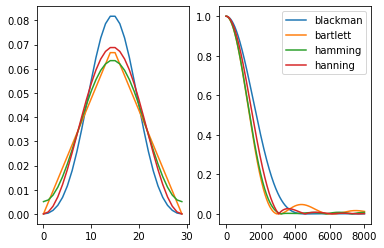

In [7]:
def plot_window(ax, window_fun, M=30):
    signal = SquareSignal(freq=440)
    wave = signal.make_wave(duration=1.0, framerate=44100)
    
    window = window_fun(M)
    window /= sum(window)
    
    padded = zero_pad(window, len(wave))
    fft = np.fft.rfft(padded)
    
    ax[0].plot(window, label=window_fun.__name__)
    ax[1].plot(abs(fft)[:8000], label=window_fun.__name__)
    plt.legend()
    
_, ax = plt.subplots(1, 2)
for w in [np.blackman, np.bartlett, np.hamming, np.hanning]:
    plot_window(ax, w)
